In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [9]:
# The 2D Gaussian distribution function
def gaussian2D(xy, x0, y0, sigma_x, sigma_y, A=1, theta=0):
    """ Gaussian in 2D with maximum at (x0, y0) of amplitude A and std deviation (sigma_x, sigma_y) rotated around an angle theta
    : (x,y): position the function is evaluated at
      (x0, y0): center of gaussian
      (sigma_x, sigma_y): std deviation along both axes
      A: amplitude, if -1 then normalized to 1 (-1 by default)
      theta: angle of rotation (radian) (0 by default)
    return: scalar
    """
    (x, y) = np.asarray(xy).reshape(2, int(np.shape(xy)[0]/2))
    a = np.cos(theta)**2/(2*sigma_x**2) + np.sin(theta)**2/(2*sigma_y**2)
    b = -np.sin(2*theta)/(4*sigma_x**2) + np.sin(2*theta)**2/(4*sigma_y**2)
    c = np.sin(theta)**2/(2*sigma_x**2) + np.cos(theta)**2/(2*sigma_y**2)
    r = np.exp(-(a*(x-x0)**2 + 2*b*(x-x0)*(y-y0) + c*(y-y0)**2))
    print(np.sum(r))
    return A*r/np.sum(r)


(2, 10, 10)
5.0893777118123085


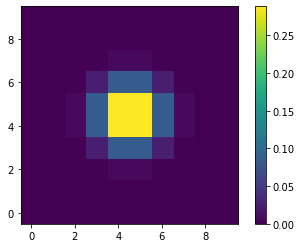

In [11]:
# Representing a 2D Gaussian distribution
xs = np.linspace(-5, 5, 10)
ys = np.linspace(-5, 5, 10)
xy = np.meshgrid(xs, ys)
xy = np.ravel(xy)

G = gaussian2D(xy, 0, 0, 1, 1, A=2)

plt.figure()
plt.imshow(G.reshape(int(np.sqrt(np.shape(G)[0])), int(
    np.sqrt(np.shape(G)[0]))), origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()

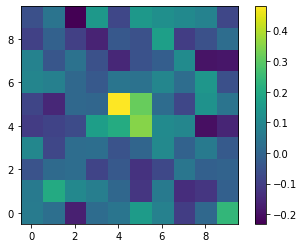

In [20]:
# Create some noisy data
data = G + 0.33*np.max(G)*np.random.normal(size=G.shape)

plt.figure()
plt.imshow(data.reshape(int(np.sqrt(np.shape(data)[0])), int(
    np.sqrt(np.shape(data)[0]))), origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()

5.0893777118123085
5.0893777118123085
5.0893777118123085
5.0893777118123085
5.0893777118123085
5.089377787650481
5.08937778765048
1.0377134085399717
1.5437017926743872
1.5437017926744812
1.5437017942463904
1.5437018159121099
1.5437018226944488
0.19171624027872095
1.5121425256996184
1.51214252569938
1.512142526663153
1.512142548791746
1.5121425546330485
1.2613654086251058
1.2613654085854131
1.2613654090083681
1.2613654308020006
1.2613654324697139
0.37862659306762925
0.37862659305658386
0.37862659321791614
0.37862660706789836
0.37862660540191345
0.012014447934374986
0.012014447932830106
0.012014447942474584
0.012014448992173018
0.012014448944547312
0.028268182771163275
0.02826818277025458
0.02826818279896613
0.028268183454065024
0.02826818623699052
0.013546158937676795
0.013546158935708723
0.013546158949523403
0.013546159601765572
0.013546160553646623
0.009870907496552743
0.00987090749569518
0.009870907506225645
0.00987090804249255
0.009870908704923067
0.0037656174217635748
0.00376561742

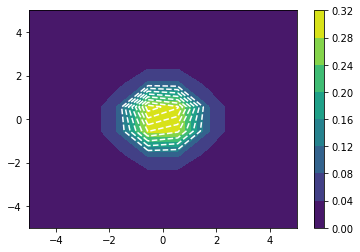

In [21]:
# Fitting of the model on the noisy data
initial_guess = (0, 0, 1, 1)
popt, pcov = opt.curve_fit(gaussian2D, xy, data, p0=initial_guess)
interpolated_data = gaussian2D(xy, popt[0], popt[1],
                               popt[2], popt[3], A=-1)
data_bis = G.reshape(int(np.sqrt(np.shape(data)[0])), int(
    np.sqrt(np.shape(data)[0])))

plt.figure()
plt.contourf(xs, ys, data_bis, origin='lower', cmap='viridis')
plt.colorbar()
plt.contour(xs, ys, interpolated_data.reshape(10, 10), 8, colors='w')
